### Let's Start!

# **Importing Libraries** <a id="1"></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
sns.set_palette("Set2")
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

from scipy import stats as st
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

from imblearn.over_sampling import SMOTE

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# **Importing Dataset** <a id="2"></a>

In [3]:
Data = pd.read_csv('/kaggle/input/air-writting/VGG16.csv')

In [4]:
Data.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,category
0,3.817872,0.995057,-7.693804,-7.198937,-0.032662,-3.928889,-0.159516,1.086920,0.576094,0.084103,1.580433,-1.452670,0.319052,1.381597,0.094868,-1.656990,0.291361,0.263907,-0.033588,-0.898724,-1.274609,1.571378,-0.919877,-1.302086,0.099501,-0.664842,-1.043166,-0.096936,0.177035,-0.180137,0.967965,1.661838,0.921356,0.827063,-0.081477,-0.394803,-0.582139,0.111649,0.598577,-0.383598,0.074524,0.305869,-0.574925,-0.236634,-0.495561,-0.891036,-0.252052,0.756891,1.298820,-0.217693,-0.084663,-0.136132,0.175489,0.362622,0.944030,0.832466,-0.918987,-0.256001,-0.881899,1.124818,0.992310,-0.030931,0.225404,0.508132,0.260143,0.596876,-0.264774,-0.208498,-0.278734,0.362602,0.378988,0.647012,-0.403580,0.060775,-0.198222,-0.174292,-0.721994,-0.006898,-0.152976,-0.312068,-0.393364,-0.499254,-0.289460,0.226371,-0.209955,0.234455,0.167953,-0.434282,0.168995,0.228989,-0.247088,-0.278381,0.195813,-0.282634,-0.005968,-0.625305,-0.580138,-0.222401,-0.059513,ain
1,-0.834011,1.563078,-3.095451,-2.099437,-3.862664,-0.224527,1.415452,0.398328,-3.198750,0.541121,-3.154092,0.783270,0.535581,2.923070,2.183960,0.840790,0.131945,-0.736529,1.191540,-0.164543,-0.828026,-0.719936,0.659200,0.483154,-1.530870,-1.005326,-0.226851,-0.656219,-0.523614,0.173656,-0.715332,0.141529,-0.757658,-0.313699,0.144239,-0.336935,0.093410,0.141974,0.850996,0.421444,-0.578570,-0.057766,0.175347,0.890588,-0.177717,-0.388172,0.118958,-0.221231,-0.100516,0.349502,0.182394,-0.311783,-0.134120,-0.019667,0.686495,-0.278514,-0.121578,-0.403599,-0.159753,-0.182230,-0.031880,0.496725,0.355150,0.248095,0.270427,0.119274,0.104712,0.099650,-0.448364,-0.392420,0.047228,-0.292184,-0.293853,-0.006042,-0.278332,0.036704,0.037422,-0.041977,0.228869,0.051728,0.264248,1.105418,-0.135950,0.080188,0.183450,0.126639,0.397580,-0.288788,-0.087040,0.088240,-0.012592,-0.675022,-0.065214,-0.016734,-0.083798,-0.220014,-0.402119,-0.292551,-0.199429,ain
2,0.547884,3.152928,-3.485234,3.246175,-2.989893,-1.578073,-1.918793,1.312590,-1.823087,-0.085687,-0.780827,0.498358,1.427512,3.440848,0.367307,1.250542,0.024863,-1.211916,-0.622880,-1.480021,-0.573043,-0.159473,-0.400248,-0.545297,-1.025116,-0.487995,-0.663562,-1.394366,-0.316061,0.339514,0.356426,-0.490206,0.283716,0.855822,0.153072,0.217476,0.829083,-0.282781,-0.430960,0.088462,-0.036307,-0.092753,-0.229448,0.877530,-0.048702,0.177389,0.035718,0.548810,0.656823,-0.047650,-0.139871,-0.263631,0.011245,-0.091528,0.128338,0.826760,0.451961,-0.258255,-0.059484,-0.139904,-0.786968,0.239001,0.252597,0.052888,0.038215,0.246417,0.621293,0.052349,-0.365373,-0.127909,0.121386,-0.454126,0.009559,-0.348524,0.451211,-0.114977,0.361899,-0.199728,0.373341,0.613431,-0.276826,0.068434,0.372646,0.162088,-0.295924,0.311658,0.341271,0.190381,0.216189,0.221315,0.329151,-0.583733,0.110577,0.312564,0.133930,-0.344793,-0.205973,-0.270515,-0.050715,ain
3,-0.009497,2.486390,-1.552915,0.828136,-0.330742,-1.397138,-3.416468,1.860958,-0.766796,1.690525,0.592964,0.372230,-0.352276,0.531647,1.975010,0.335868,1.033634,-0.870015,-0.245462,-0.121904,-0.222116,-0.214574,-0.021057,-0.698129,-2.106163,-1.339741,-0.880001,0.319826,-0.950802,-0.454318,0.278885,-1.384004,-0.486394,0.174115,-0.635096,0.131896,0.261193,0.633273,-0.354376,1.326471,-0.097974,0.050815,0.412710,-0.280371,0.287251,-0.536344,-0.085942,0.500941,0.401009,0.085436,0.012418,-0.166177,0.513061,0.513235,0.048203,0.280687,-0.190708,0.146651,0.302670,-0.351207,0.151985,-0.035920,0.497562,0.393970,-0.282886,0.215943,-0.246602,-0.070713,0.078385,

In [5]:
# Extract the category column
category_column = Data['category']

# Get unique categories
unique_categories = category_column.unique()

# Print the unique categories
print("Unique Categories:")
for category in unique_categories:
    print(category)

Unique Categories:
ain
alif
beh
dal
feh
heh
jeem
kaf
lam
meem
noon
qaf
raa
sad
seen
tah
waw
yaa


**There are null values present in 'bmi'.**

In [6]:
Data.isnull().sum()

PC1         0
PC2         0
PC3         0
PC4         0
PC5         0
PC6         0
PC7         0
PC8         0
PC9         0
PC10        0
PC11        0
PC12        0
PC13        0
PC14        0
PC15        0
PC16        0
PC17        0
PC18        0
PC19        0
PC20        0
PC21        0
PC22        0
PC23        0
PC24        0
PC25        0
PC26        0
PC27        0
PC28        0
PC29        0
PC30        0
PC31        0
PC32        0
PC33        0
PC34        0
PC35        0
PC36        0
PC37        0
PC38        0
PC39        0
PC40        0
PC41        0
PC42        0
PC43        0
PC44        0
PC45        0
PC46        0
PC47        0
PC48        0
PC49        0
PC50        0
PC51        0
PC52        0
PC53        0
PC54        0
PC55        0
PC56        0
PC57        0
PC58        0
PC59        0
PC60        0
PC61        0
PC62        0
PC63        0
PC64        0
PC65        0
PC66        0
PC67        0
PC68        0
PC69        0
PC70        0
PC71        0
PC72  

# **Data Preprocessing** <a id="4"></a>

In [7]:
X = Data.drop('category', axis=1)
y = Data.category    

# Splitting the dataset into the Training set and Test set <a id="6"></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [9]:
!pip install scikit-optimize


Test Accuracy: 0.8638888888888889


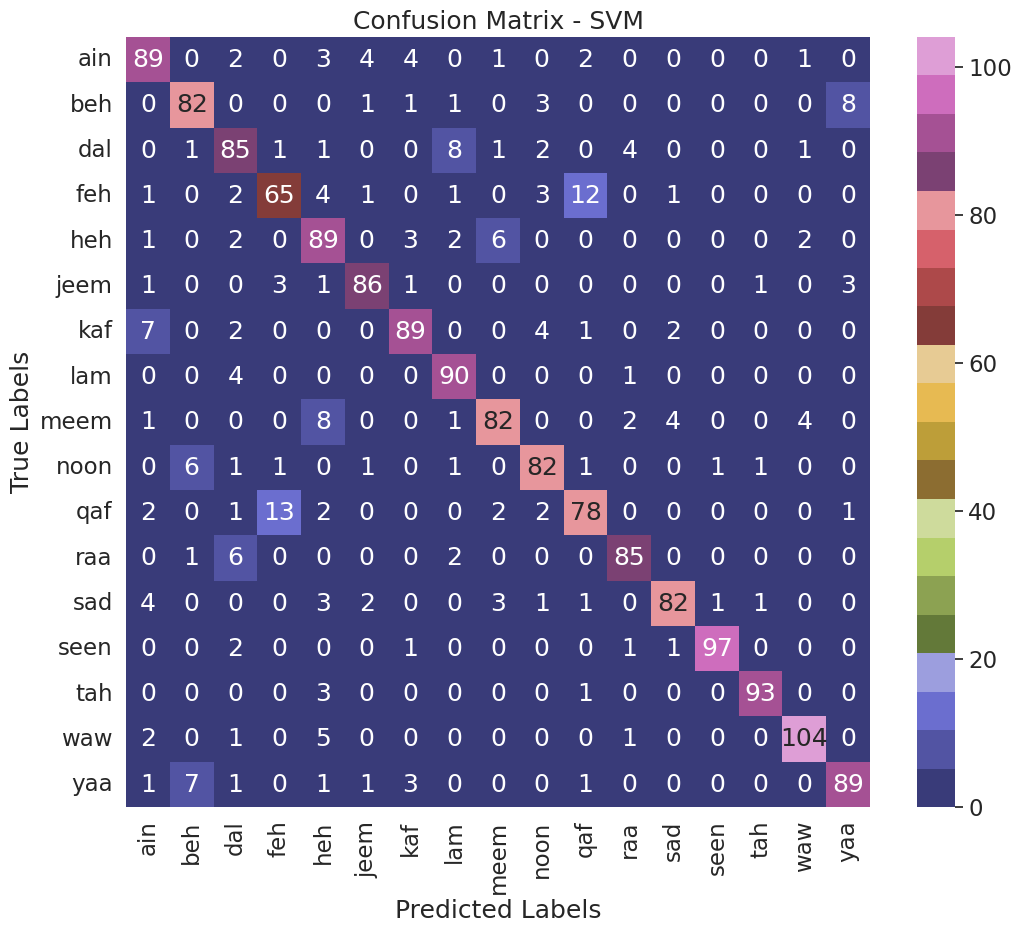

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a Support Vector Machine (SVM) classifier
classifier = SVC()

# Bayesian Optimization for hyperparameter tuning
param_grid = {
    'C': (0.1, 10.0, 'log-uniform'),
    'gamma': (0.0001, 0.1, 'log-uniform'),
    'kernel': ['linear', 'rbf']
}

bayes_search = BayesSearchCV(
    classifier,
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    n_iter=50,  # Number of search iterations
    random_state=0
)
bayes_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = bayes_search.best_params_

# Train the SVM classifier with the best hyperparameters
classifier = SVC(**best_params)
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
accuracy = classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Define the categories
categories = ['ain', 'beh', 'dal', 'feh', 'heh', 'jeem', 'kaf', 'lam', 'meem', 'noon', 'qaf', 'raa', 'sad', 'seen', 'tah', 'waw', 'yaa']

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred, labels=categories)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="tab20b", xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Test Accuracy: 0.8633333333333333


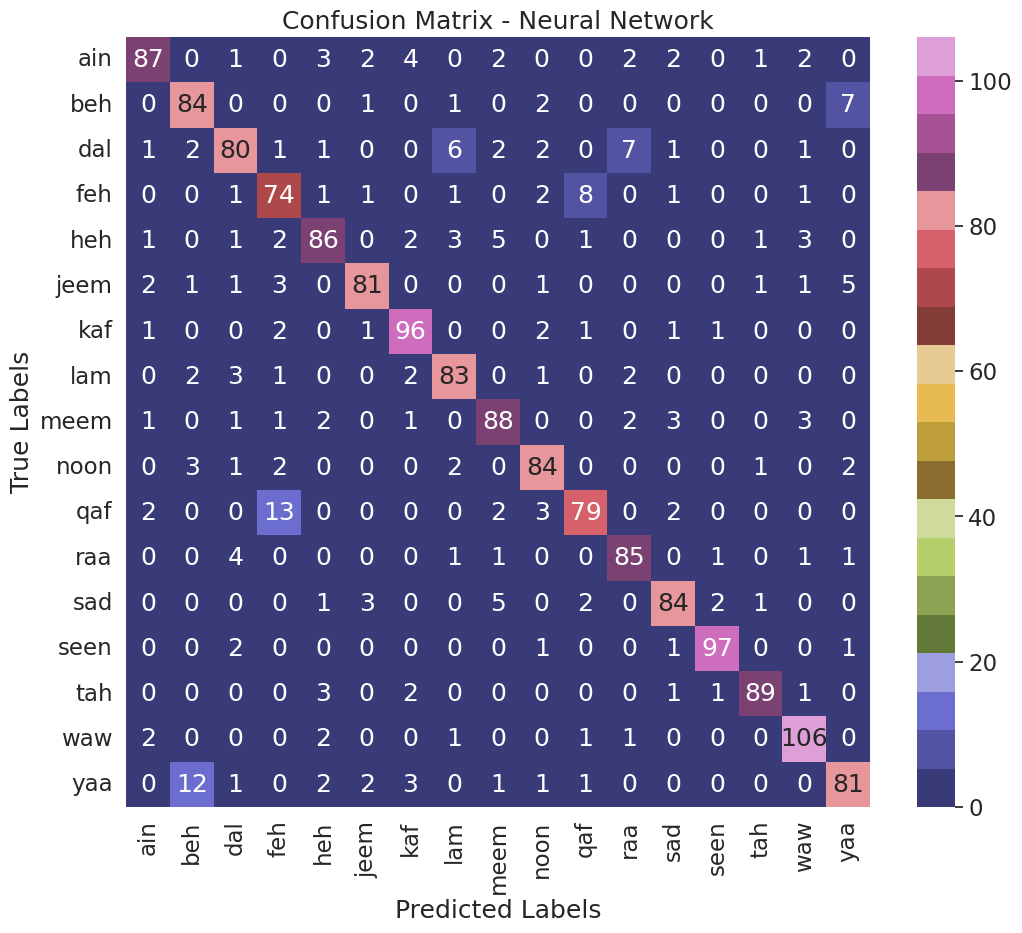

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a Neural Network classifier
classifier = MLPClassifier(random_state=42)

# Grid Search Optimization for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(
    classifier,
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Neural Network classifier with the best hyperparameters
classifier = MLPClassifier(random_state=42, **best_params)
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
accuracy = classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Define the categories
categories = ['ain', 'beh', 'dal', 'feh', 'heh', 'jeem', 'kaf', 'lam', 'meem', 'noon', 'qaf', 'raa', 'sad', 'seen', 'tah', 'waw', 'yaa']

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred, labels=categories)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="tab20b", xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Test Accuracy: 0.7572222222222222


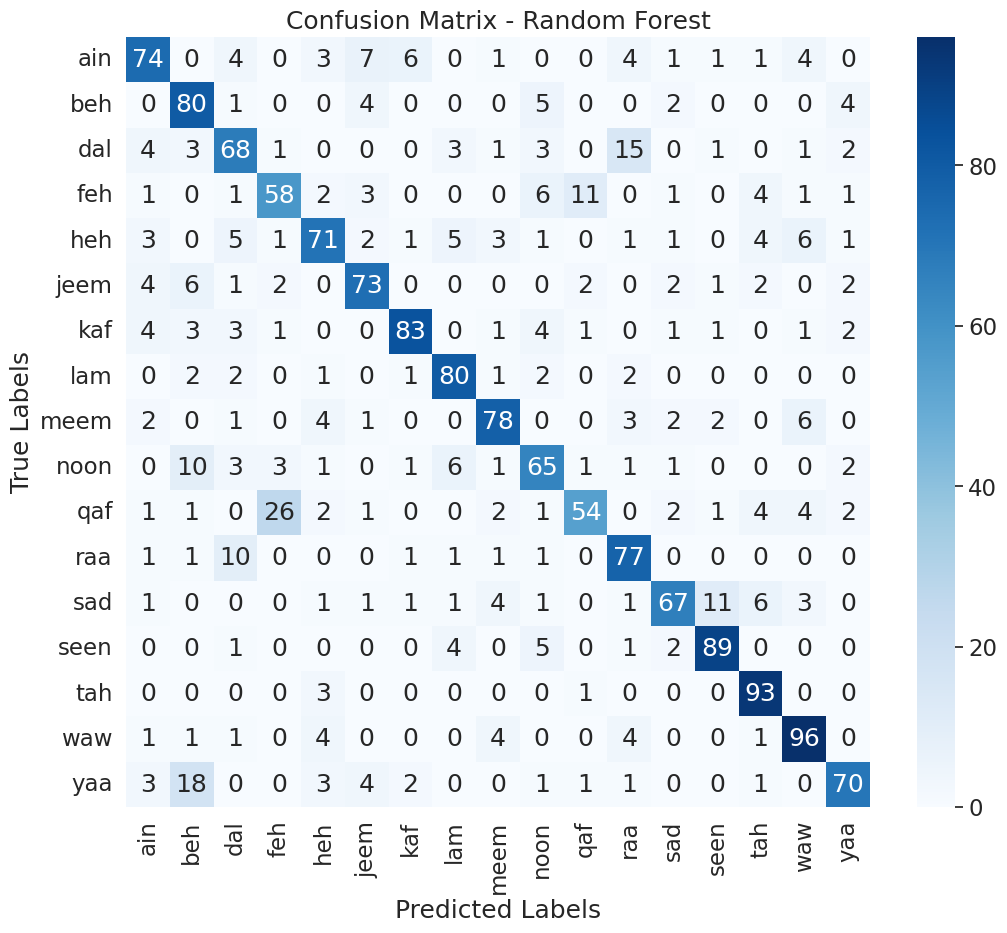

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the Random Forest classifier
classifier = RandomForestClassifier(random_state=42)

# Set the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search Optimization for hyperparameter tuning
grid_search = GridSearchCV(
    classifier,
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Random Forest classifier with the best hyperparameters
classifier = RandomForestClassifier(random_state=42, **best_params)
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
accuracy = classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Define the categories
categories = ['ain', 'beh', 'dal', 'feh', 'heh', 'jeem', 'kaf', 'lam', 'meem', 'noon', 'qaf', 'raa', 'sad', 'seen', 'tah', 'waw', 'yaa']

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred, labels=categories)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Test Accuracy: 0.7511111111111111


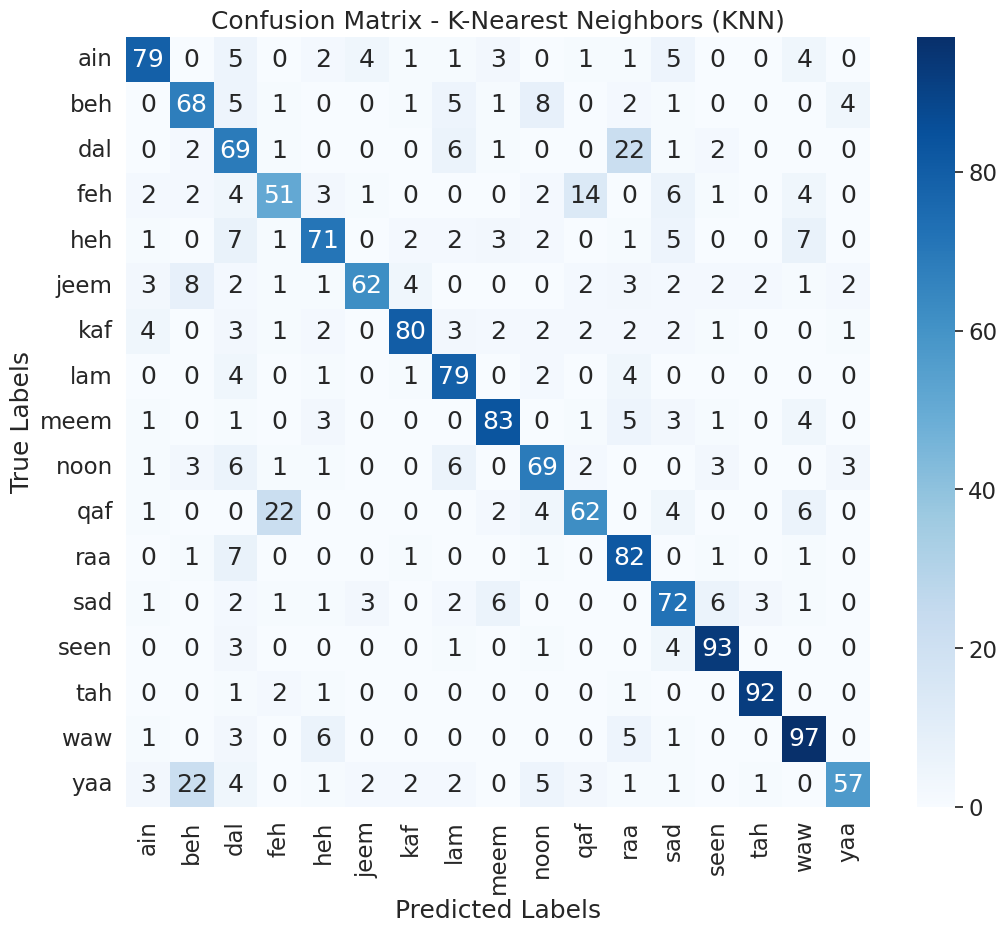

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the KNN classifier
classifier = KNeighborsClassifier()

# Set the hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Grid Search Optimization for hyperparameter tuning
grid_search = GridSearchCV(
    classifier,
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the KNN classifier with the best hyperparameters
classifier = KNeighborsClassifier(**best_params)
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
accuracy = classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Define the categories
categories = ['ain', 'beh', 'dal', 'feh', 'heh', 'jeem', 'kaf', 'lam', 'meem', 'noon', 'qaf', 'raa', 'sad', 'seen', 'tah', 'waw', 'yaa']

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred, labels=categories)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix - K-Nearest Neighbors (KNN)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Test Accuracy: 0.37444444444444447


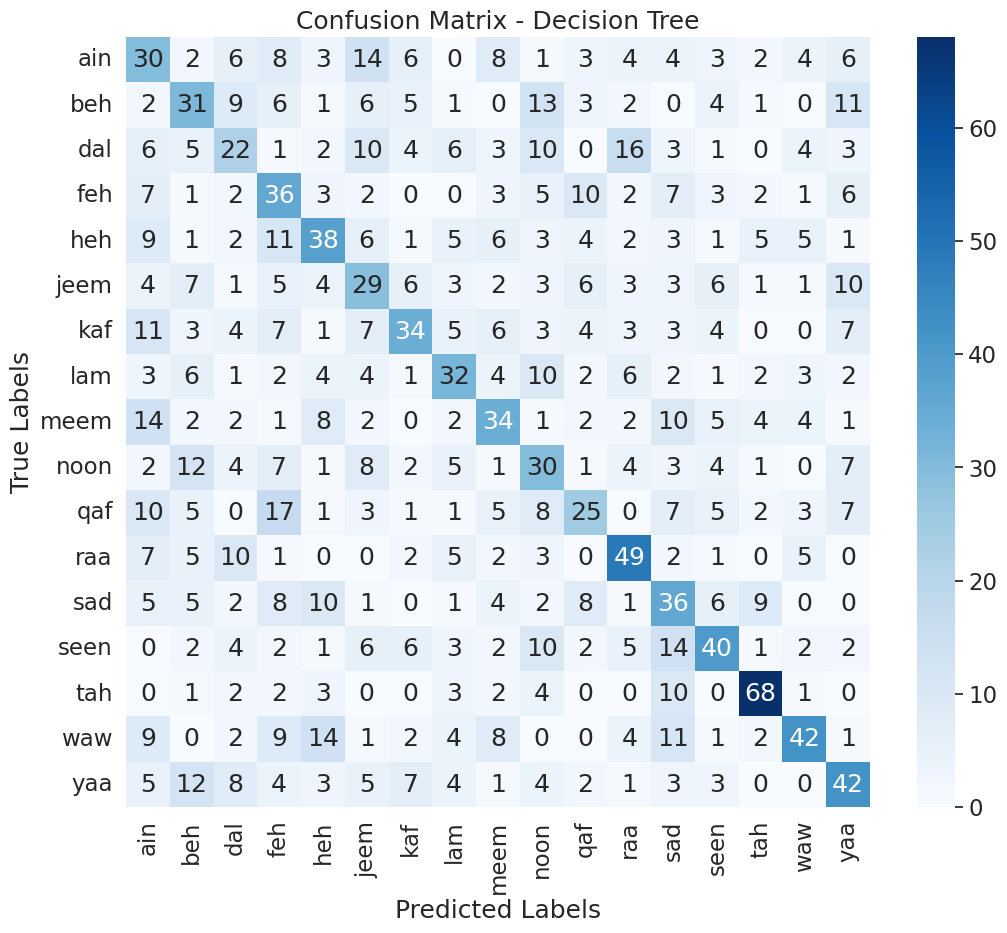

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the Decision Tree classifier
classifier = DecisionTreeClassifier()

# Set the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search Optimization for hyperparameter tuning
grid_search = GridSearchCV(
    classifier,
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Decision Tree classifier with the best hyperparameters
classifier = DecisionTreeClassifier(**best_params)
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
accuracy = classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Define the categories
categories = ['ain', 'beh', 'dal', 'feh', 'heh', 'jeem', 'kaf', 'lam', 'meem', 'noon', 'qaf', 'raa', 'sad', 'seen', 'tah', 'waw', 'yaa']

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred, labels=categories)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

